In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/images (4).jpeg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/ircmj-17-3-13478-g001-preview.png
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/lip-cancer-and-symptoms.jpg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/dataset_41457tn.jpg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/949b9f09-aa54-454e-b631-b6d98e079f45.jpg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/pract_oral_cancer.jpg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/figure1.jpg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/dataset_Carcinomaoftherighttongue_OCT-20161108085557163.jpg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/d09a9b5c-a0b1-488f-9d50-2937fe578a7e.jpg
/kaggle/input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/mouth-cancer-symptoms-1.jpg
/kaggle/input/oral-cancer-li

In [2]:
# Importing Necessary Libraries
import cv2
import os
import shutil 
import math
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Function to remove Duplicate Images in the Dataset
def findDelDuplImg(file_name , file_dir):
    searchedImgPath = os.path.join(file_dir, file_name);
    searchedImage = np.array(cv2.imread(searchedImgPath, 0));
    # Start iterate over all images
    for cmpImageName in os.listdir(file_dir):
        if cmpImageName != file_name:
            # If name is different
            try:
                # Concatenate path to image
                cmpImagePath = os.path.join(file_dir, cmpImageName);
                # Open image to be compared
                cmpImage = np.array(cv2.imread(cmpImagePath, 0))
                # Count root mean square between both images (RMS)
                rms = math.sqrt(mean_squared_error(searchedImage, cmpImage))
            except:
                continue
            # If RMS is smaller than 3 - this means that images are similar or the same
            if rms < 3:
                # Delete Same Image in Dir
                os.remove(cmpImagePath);
                
# Function for Image preprocessing
def processDataset(dataset_src, dataset_dest):
    # Making a Copy of Dataset
    shutil.copytree(src, dest)
    for folder in os.listdir(dest):
        for (index, file) in enumerate(os.listdir(os.path.join(dest, folder)), start = 1):
            filename = f'img_{folder}_{index}.jpg';
            img_src = os.path.join(dest, folder, file);
            img_des = os.path.join(dest, folder, filename);
            # Preprocess the Images
            img = cv2.imread(img_src);
            img = cv2.resize(img, (256, 256));
            img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0);
            img = cv2.blur(img, (2, 2));
            cv2.imwrite(img_des ,img);
            os.remove(img_src);
        for file in os.listdir(os.path.join(dest, folder)):
                # Find duplicated images and delete duplicates.
                findDelDuplImg(file, os.path.join(dest, folder));

# Source Location for Dataset
src = '../input/oral-cancer-lips-and-tongue-images/OralCancer';
# Destination Location for Dataset
dest = './OralCancer';
# Image preprocessing
processDataset(src, dest);

libpng warning: iCCP: extra compressed data
libpng warning: iCCP: extra compressed data
[ WARN:0@8.854] global loadsave.cpp:248 findDecoder imread_('./OralCancer/cancer/img_cancer_26.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.089] global loadsave.cpp:248 findDecoder imread_('./OralCancer/cancer/img_cancer_50.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.411] global loadsave.cpp:248 findDecoder imread_('./OralCancer/cancer/img_cancer_58.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.642] global loadsave.cpp:248 findDecoder imread_('./OralCancer/cancer/img_cancer_82.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.869] global loadsave.cpp:248 findDecoder imread_('./OralCancer/cancer/img_cancer_18.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10.420] global loadsave.cpp:248 findDecoder imread_('./OralCancer/cancer/img_cancer_35.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10

In [4]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
path = "./OralCancer"
DatasetSize = GetDatasetSize(path);
print(DatasetSize);

{'non-cancer': 44, 'cancer': 64}


In [5]:
# Function for Creating Train / Validation / Test folders (One time use Only)
 
def TrainValTestSplit(root_dir, classes_dir, val_ratio = 0.15, test_ratio = 0.15):
    for cls in classes_dir:
        # Creating Split Folders
        os.makedirs('train/' + cls)
        os.makedirs('val/' + cls)
        os.makedirs('test/' + cls)

        # Folder to copy images from
        src = root_dir + cls
        
        # Storing the Filenames
        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        # Spliting the Files in the Given ratio
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), int(len(allFileNames)* (1 - test_ratio))])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

        # Printing the Split Details
        print(cls.upper(),':')
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, 'train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, 'val/' + cls)
            
        for name in test_FileNames:
            shutil.copy(name, 'test/' + cls)
        print();

# Preforming Train / Validation / Test Split
root_dir = './OralCancer/'              # Dataset Root Folder
classes_dir = ['cancer', 'non-cancer']  # Classes
TrainValTestSplit(root_dir, classes_dir);

CANCER :
Total images:  64
Training:  44
Validation:  10
Testing:  10

NON-CANCER :
Total images:  44
Training:  30
Validation:  7
Testing:  7



In [6]:
# Importing Keras for Image Classification
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

2024-03-13 16:53:26.684870: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 16:53:26.685025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 16:53:26.846147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
# CNN Model 

model = Sequential() 

# Convolutional Layer with input shape (256,256,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(256,256,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,475,425 (28.52 MB)

 Trainable params: 7,475,425 (28.52 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Expand the size of dataset with new transformed images from the original dataset using ImageDataGenerator.
from tensorflow.keras.preprocessing import image

train_datagen = image.ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True)
val_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [9]:
train_data = train_datagen.flow_from_directory(directory= "./train", target_size=(256,256), batch_size=32, class_mode = 'binary')

Found 74 images belonging to 2 classes.


In [10]:
train_data.class_indices

{'cancer': 0, 'non-cancer': 1}

In [11]:
val_data = val_datagen.flow_from_directory(directory= "./val", target_size=(256,256), batch_size=32, class_mode = 'binary')

Found 17 images belonging to 2 classes.


In [12]:
test_data = test_datagen.flow_from_directory(directory= "./test", target_size=(256,256), batch_size=32, class_mode = 'binary')

Found 17 images belonging to 2 classes.


In [13]:
# Adding Model check point Callback
mc = ModelCheckpoint(filepath="oral_cancer_best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
call_back = [ mc ];

In [14]:
# Fitting the Model
cnn = model.fit(train_data, 
                  steps_per_epoch = 2, 
                  epochs = 32, 
                  validation_data = val_data, 
                  validation_steps = 1,
                  callbacks = call_back )

Epoch 1/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4531 - loss: 0.8107
Epoch 1: val_accuracy improved from -inf to 0.41176, saving model to oral_cancer_best_model.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 6s/step - accuracy: 0.4688 - loss: 0.8489 - val_accuracy: 0.4118 - val_loss: 0.7533
Epoch 2/32
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step - accuracy: 0.5000 - loss: 0.8099
Epoch 2: val_accuracy did not improve from 0.41176
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5000 - loss: 0.6075 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/32
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5881 - loss: 0.6836
Epoch 3: val_accuracy did not improve from 0.41176
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.5508 - loss: 0.6911 - val_accuracy: 0.4118 - val_loss: 0.7138
Epoch 4/32
1/2 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.2500 - loss: 0.7468
Epoch 4: val_accuracy did not improve from 0.41176
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.2500 - loss: 0.5601 - val_ac

In [15]:
# Checking the Accuracy of the Model 
accuracy = model.evaluate(test_data)[1]
print(f"The accuracy of the model is = {accuracy * 100} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step - accuracy: 0.8235 - loss: 0.5642
The accuracy of the model is = 82.35294222831726 %


In [16]:
h =  cnn.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

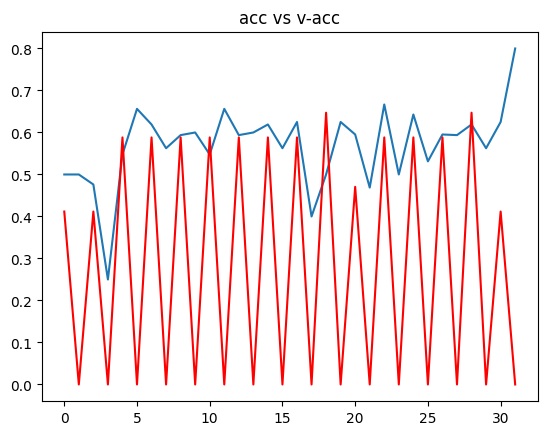

In [17]:
# Ploting Accuracy In Training Set & Validation Set
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

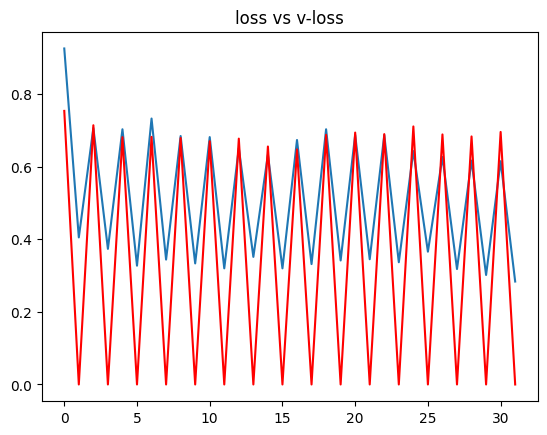

In [18]:
# Ploting Loss In Training Set & Validation Set
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [19]:
def cancerPrediction(path):
    # Loading Image
    img = image.load_img(path, target_size=(256,256))
    # Normalizing Image
    norm_img = image.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = (model.predict(input_arr_img) > 0.5).astype(int)[0][0]
    # Printing Model Prediction
    if pred == 0:
        print("Cancer")
    else:
        print("Non-Cancer")
    
# Path for the image to get predictions    
path = "../input/oral-cancer-lips-and-tongue-images/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg"
cancerPrediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Non-Cancer
